## Uncertainty in Near-Infrared Reddening

Project piece for Megan!

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as ss

In [2]:
%matplotlib inline

We'll start with the intrinsic colors and spectral types.

In [3]:
intHK= np.array([-0.1,-0.09,-0.09,-0.09,-0.09,-0.08,-0.09,-0.06,-0.07,-0.05,-0.06,-0.05,-0.05,-0.03,0,0.0025,0.005,0.0083,
            0.0117,0.015,0.02,0.025,0.0267,0.0283,0.03,0.0325,0.035,0.0367,0.0383,0.04,0.0425,0.045,0.0467,0.0483,
            0.05,0.051,0.052,0.0535,0.055,0.0575,0.06,0.06375,0.0675,0.07125,0.075,0.0825,0.09,0.0975,0.105,0.11,0.12,
            0.13,0.14217,0.1533,0.165,0.2,0.21,0.25,0.275,0.32,0.37]) 

intJH= np.array([-0.065,-0.065,-0.075,-0.095,-0.095,-0.075,-0.025,-0.045,-0.035,-0.045,-0.025,-0.025,-0.005,0.005,0,0.01,
            0.02,0.033,0.0467,0.06,0.075,0.09,0.103,0.117,0.13,0.1475,0.165,0.187,0.208,0.23,0.258,0.285,0.292,0.298,
            0.305,0.3125,0.32,0.325,0.33,0.35,0.37,0.39,0.41,0.43,0.45,0.475,0.5,0.54,0.58,0.61,0.635,0.66,0.6717,
            0.683,0.695,0.68,0.665,0.62,0.6,0.62,0.6])

SpType=np.array(['O6V','O7V','O8V','O9V','B0V','B1V','B2V','B3V','B4V','B5V','B6V','B7V','B8V','B9V',
            'A0V','A1V','A2V','A3V','A4V','A5V','A6V','A7V','A8V','A9V',
            'F0V','F1V','F2V','F3V','F4V','F5V','F6V','F7V','F8V','F9V',
            'G0V','G1V','G2V','G3V','G4V','G5V','G6V','G7V','G8V','G9V',
            'K0V','K1V','K2V','K3V','K4V','K5V','K6V','K7V','K8V','K9V',
            'M0V','M1V','M2V','M3V','M4V','M5V','M6V'])

# Use x as the bin indices
x=np.arange(intHK.size)

We start with a value of R and E(H-K) for the simulated line of sight.  For the spectral type of a background star, these choices for the line of sight imply observed colors.  


In [4]:
# Choose line-of-sight R and E(H-K)
losR=1.6
losEHK=0.4
losEJH=losR*losEHK


# Calculate the error-free photometry, all spectral types
simJH=losEJH+intJH
simHK=losEHK+intHK

# Choose spectral type by list index
meanbin = 24
stdbin = 2   # standard error, in units of number of list items
print("Spectral type is ",SpType[meanbin])

Spectral type is  F0V


We then simulate uncertainty in observed colors and knowledge of spectral type with Monte Carlo sampling of normal distributions, recalcuating R at each sample.


In [5]:
# This function creates a set of probabilities, one for each possible spectral type.

def prob_bins(x,meanbin,stdbin):
    # Create the probability distribution:
    lowedge, highedge = np.arange(len(x))-0.5,np.arange(len(x))+0.5 # put items at bin centers
    prob_bins = ss.norm.cdf(highedge, loc=meanbin, 
                            scale = stdbin)-ss.norm.cdf(lowedge, loc=meanbin, scale = stdbin)
    prob_bins = prob_bins / prob_bins.sum() # normalize the probabilities so their sum is 1

    return prob_bins



mean standard_deviation
1.59681247184 0.0318614917479
1.59063420402 0.0658529164764
1.57048471476 0.131568728103


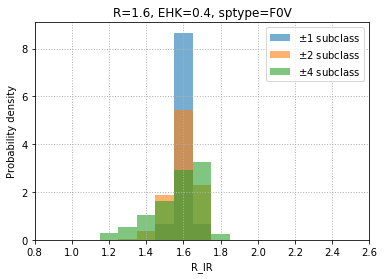

In [6]:
fig,ax=plt.subplots(1,1)

print('mean','standard_deviation')

for stdbins in [1,2,4]:
    # Sample the probability distribution:
    prob = prob_bins(x,meanbin,stdbins) # customize the probability distribution
    nums = np.random.choice(x, size = 100000, p = prob) # a set of chosen bin indices

    R=(simJH[meanbin]-intJH[nums])/(simHK[meanbin]-intHK[nums])
    print(np.mean(R),np.std(R))
    ax.hist(R,30,range=(0.05,3.05),normed=True,label='$\pm$'+str(stdbins)+' subclass',alpha=0.6)

ax.set_xlabel('R_IR')
ax.set_ylabel('Probability density')
ax.set_title('R='+str(losR)+', EHK='+str(losEHK)+', sptype='+SpType[meanbin])
ax.grid(linestyle='dotted',linewidth=1)
ax.set_xlim(.8,2.6)
ax.legend(loc='best')
plt.show()

In [7]:
np.sum([R<1.6])/1E5,np.sum([R>1.6])/1E5

(0.45089000000000001, 0.54910999999999999)

In [8]:
np.sqrt(np.mean((R[R<1.6]-1.6)**2)),np.sqrt(np.mean((R[R>1.6]-1.6)**2))

(0.17917520517621868, 0.082155369749551191)

By introducing an uncertainty in the spectral classes, we have created an uncertainty in R that is comparable in size to the uncertainty introduced by photometry.  This is unsurprising, especially where intrinsic colors in adjacent spectral types differ on the same order as typical uncertainty in measured colors.

What may be surprising is the asymmetry of the distribution.  In the example shown here of an F0V type known to within 4 subclasses and E(J-H)=0.4, we can notice the following things:

* The most common measurement is R = 1.7, higher than 1.6.
* Fewer measurements fall below 1.6 than above 1.6.
* The distribution has a broader range below 1.6 than above 1.6.  We see this from the root-mean-square deviation of measurements below R=1.6 versus those above R=1.6.  

Astronomers expect a distribution that is symmetric around a mean of 1.6.  Our point in this paper is to warn astronomers about which combinations of reddening and spectral type uncertainty yield shifted, asymetric distributions.

Megan's task is to identify where in (<code>losEHK</code>,<code>stdbin</code>) space the distribution is shifted and/or asymetric.  Here is a sample calculation:

In [9]:
# Choose line-of-sight R and E(H-K)
losR=1.6
losEHK=0.4 # MEGAN CHANGES THIS NUMBER
losEJH=losR*losEHK

# Calculate the error-free photometry, all spectral types
simJH=losEJH+intJH
simHK=losEHK+intHK

# Choose spectral type by list index
meanbin = 24
stdbin = 4   # MEGAN CHANGES THIS NUMBER

# Sample the probability distribution:
# customize the probability distribution
prob = prob_bins(x,meanbin,stdbins) 
# randomly choose a set of bin indices based on that probability
nums = np.random.choice(x, size = 100000, p = prob) 

R=(simJH[meanbin]-intJH[nums])/(simHK[meanbin]-intHK[nums])

print('stdbin','R_mean','std_dev','RMS_R<1.6','RMS_R<1.6')
print(stdbin,np.mean(R),np.std(R),np.sqrt(np.mean((R[R<1.6]-1.6)**2)),np.sqrt(np.mean((R[R>1.6]-1.6)**2)))

stdbin R_mean std_dev RMS_R<1.6 RMS_R<1.6
4 1.57081829215 0.131672002533 0.179093610989 0.082530504032


We'll need to eventually repeat for all the spectral types, called <code>meanbin</code> here.